# AQI Prediction Model

### Pollutants
- Particulate matter: PM2.5, PM10
- Oxides: NO, NO2, CO, SO2, O3
- Hydrocarbons: Benzene, Toulene, Xyelene
- Ammonia

In [87]:
# Importing Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings as filterwarnings
#filterwarnings('ignore')

In [88]:
df =pd.read_csv('air quality data.csv')
df.head(4)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN


In [89]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [90]:
# Dropping rows with null AQI values
df.dropna(subset=['AQI'], inplace=True)

In [91]:
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
City              0
Date              0
AQI               0
AQI_Bucket        0
dtype: int64

In [92]:
#Staristics about AQI data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [93]:
#Percentage of null values 
null_values_perc =(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
null_values_perc

Xylene        61.859155
PM10          28.515091
NH3           26.301811
Toluene       23.444668
Benzene       14.225352
NOx            7.472837
O3             3.247485
PM2.5          2.728370
SO2            2.434608
CO             1.790744
NO2            1.573441
NO             1.557344
City           0.000000
Date           0.000000
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

### Key considerations
- Xylene has the most missing values
- PM10 and NH3 also have significant missing values 

## Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

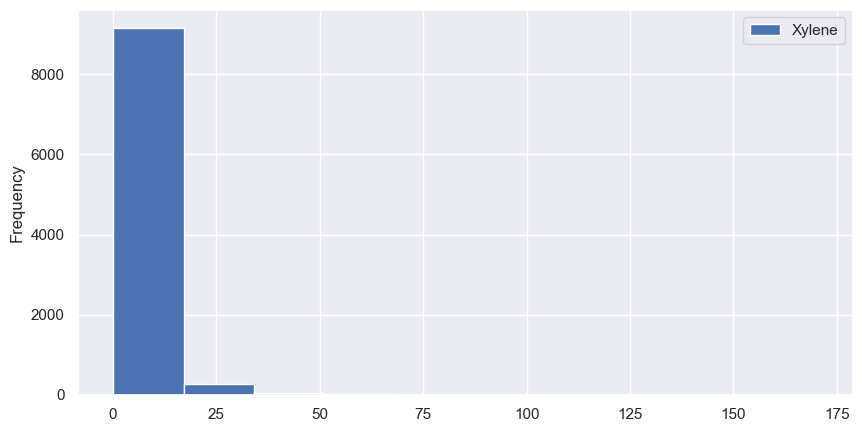

In [94]:
# Univariate Analysis
df['Xylene'].plot(kind="hist",figsize=(10,5))
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

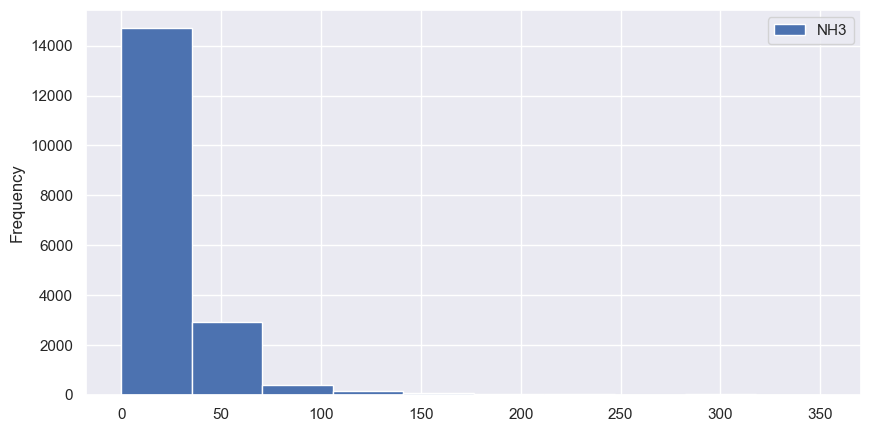

In [95]:
df['NH3'].plot(kind="hist",figsize=(10,5))
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

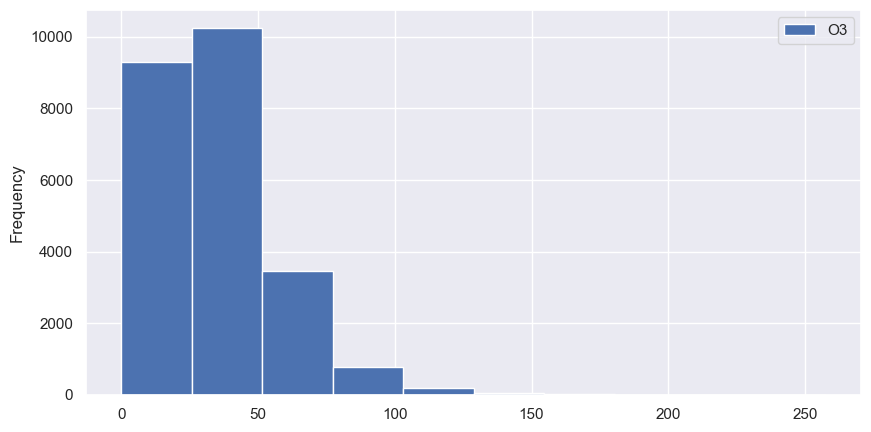

In [96]:
df['O3'].plot(kind="hist",figsize=(10,5))
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

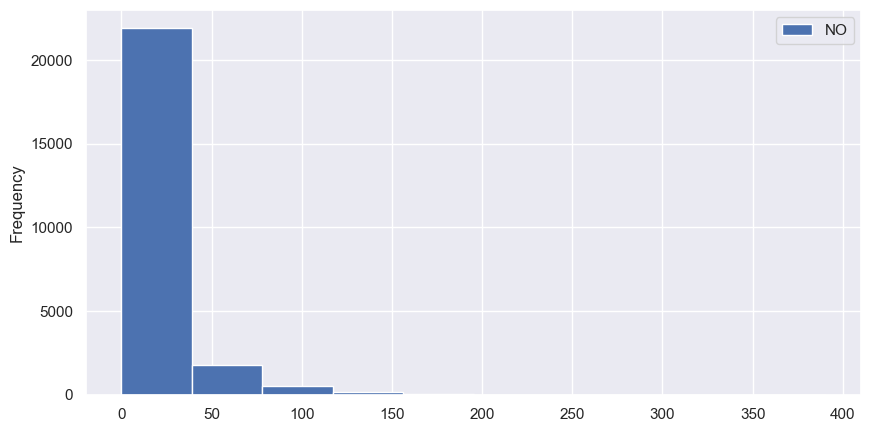

In [97]:
df['NO'].plot(kind="hist",figsize=(10,5))
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

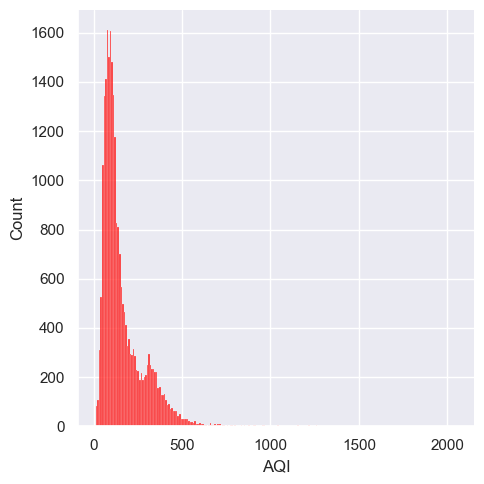

In [98]:
# Distribution of AQI from 2015 to 2020
sns.displot(df,x='AQI', color='red')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

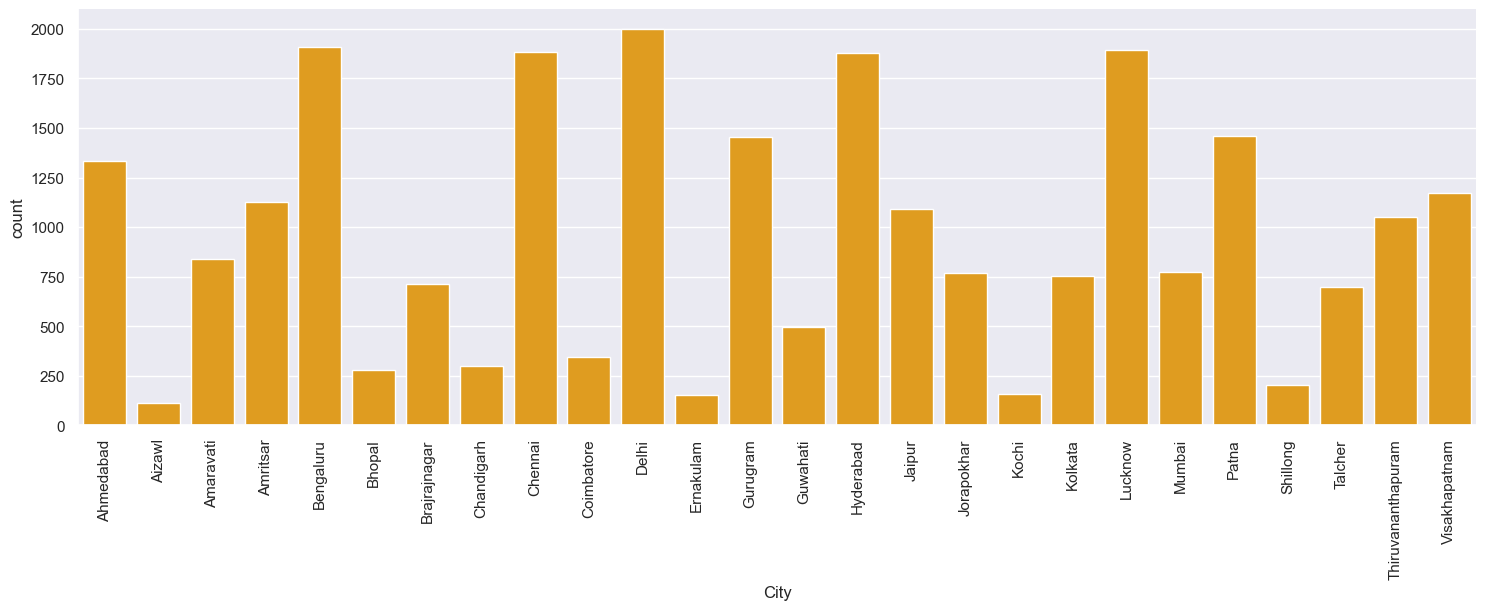

In [99]:
# Bivariate Analysis
sns.set_theme(style="darkgrid")
graph = sns.catplot(x="City", kind="count", data=df, height=5, aspect=3,color='orange')
graph.set_xticklabels(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

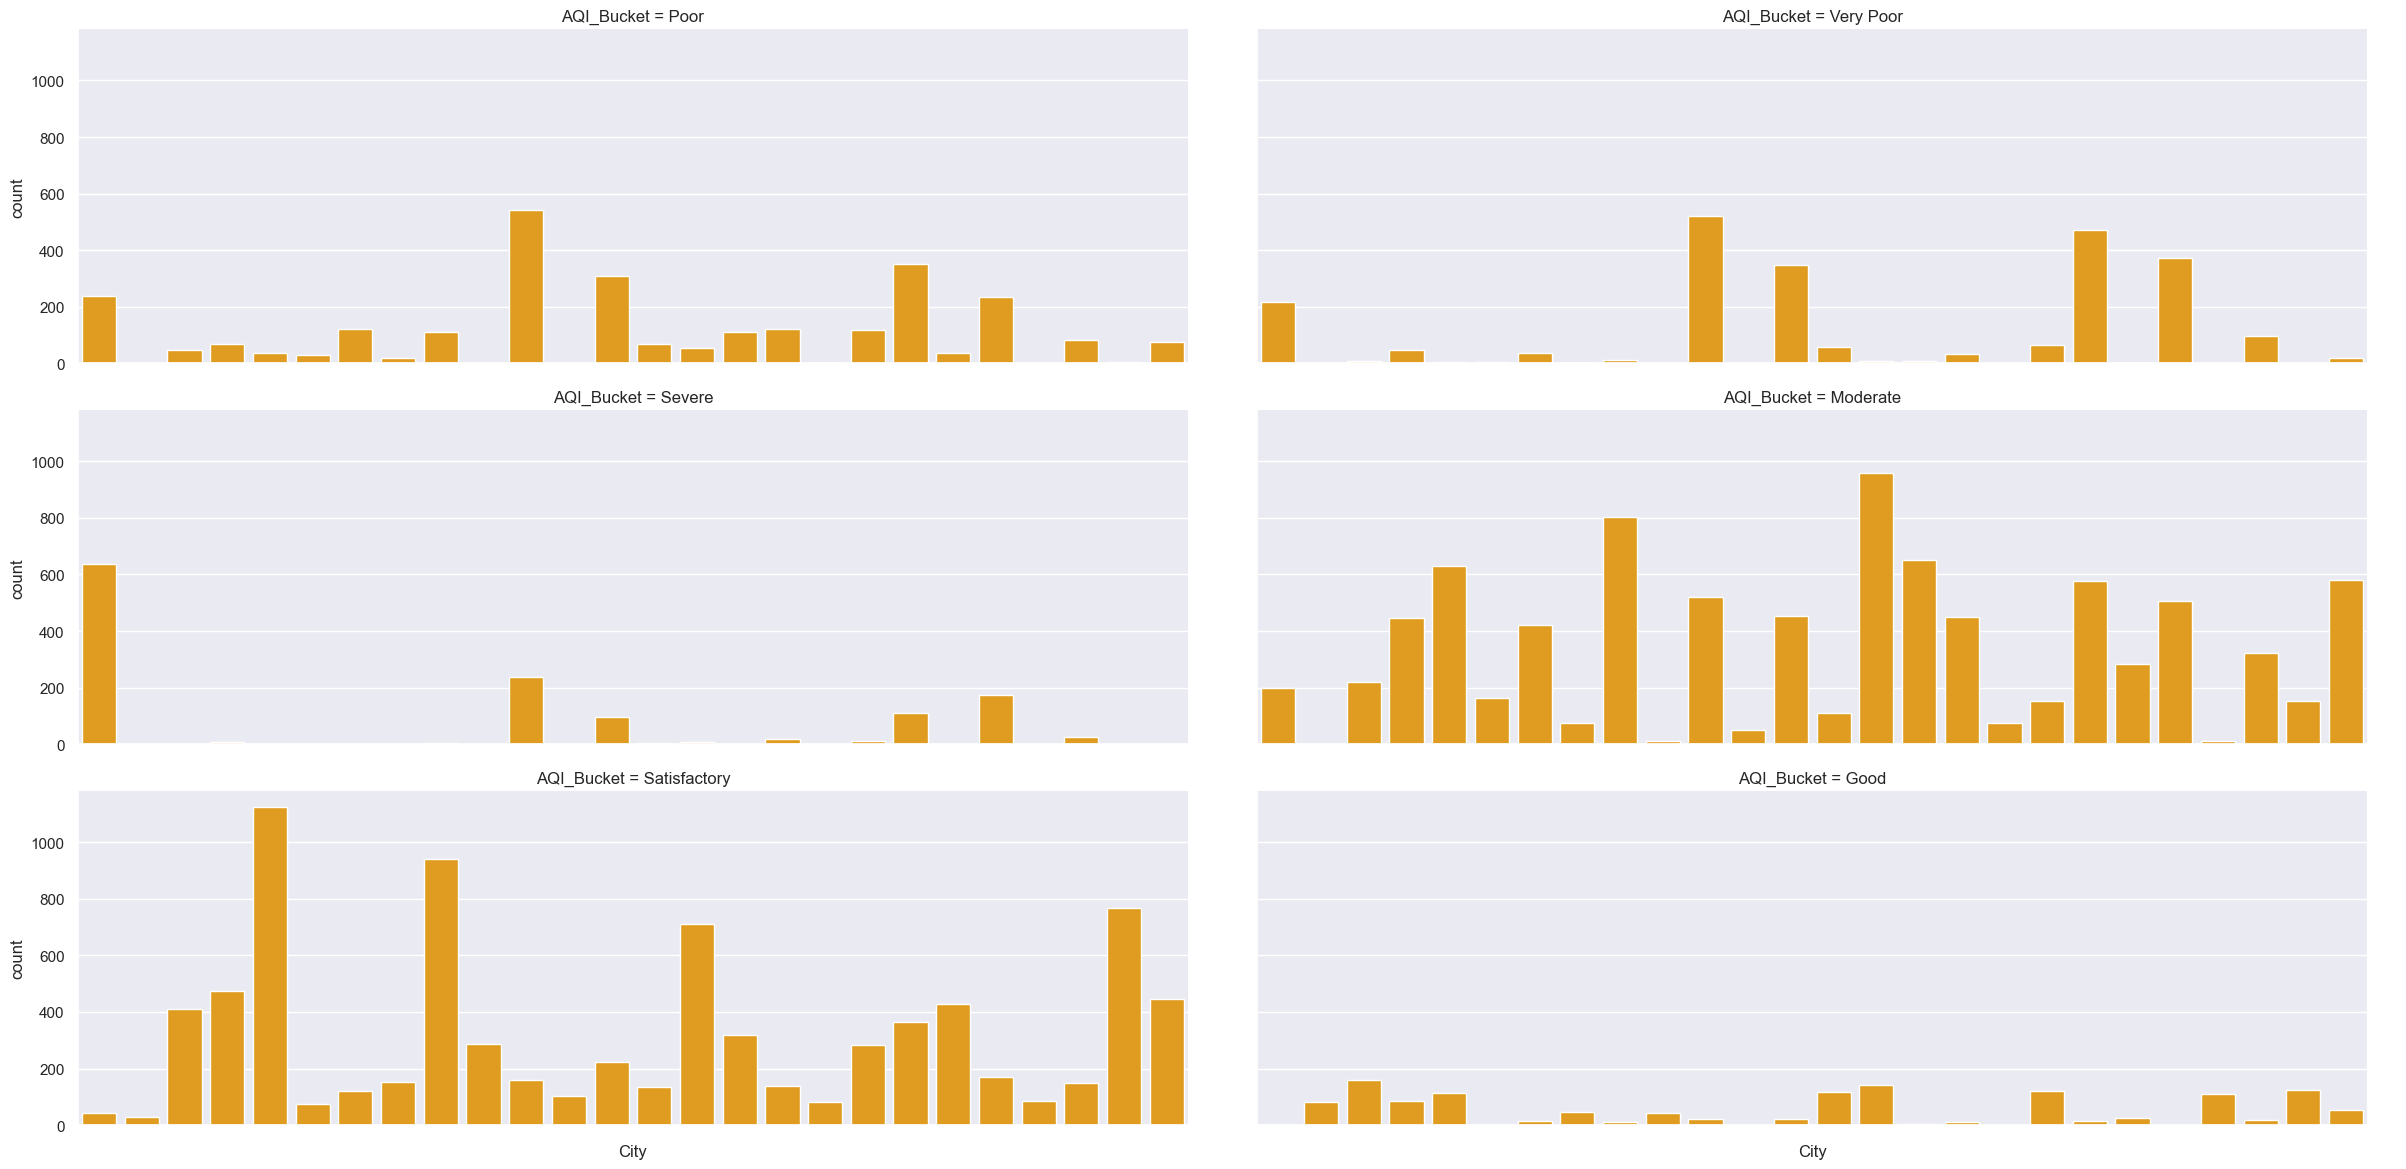

In [100]:
# Bivariate Analysis
sns.set_theme(style="darkgrid")
graph = sns.catplot(x="City", kind="count", data=df, col='AQI_Bucket', height=4, col_wrap=2, aspect=3,color='orange')
graph.set_xticklabels(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

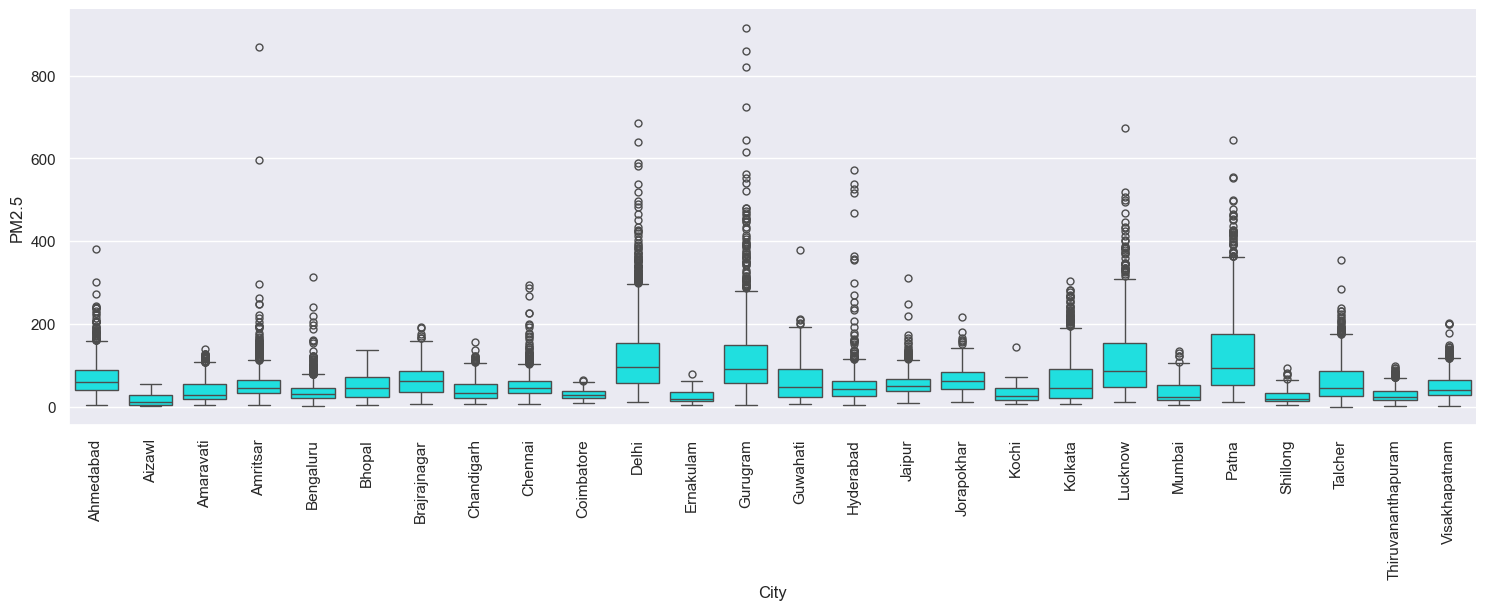

In [101]:
graph1 = sns.catplot(x='City', y='PM2.5', kind ='box',data=df,height=5,aspect=3,color='cyan')
graph1.set_xticklabels(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

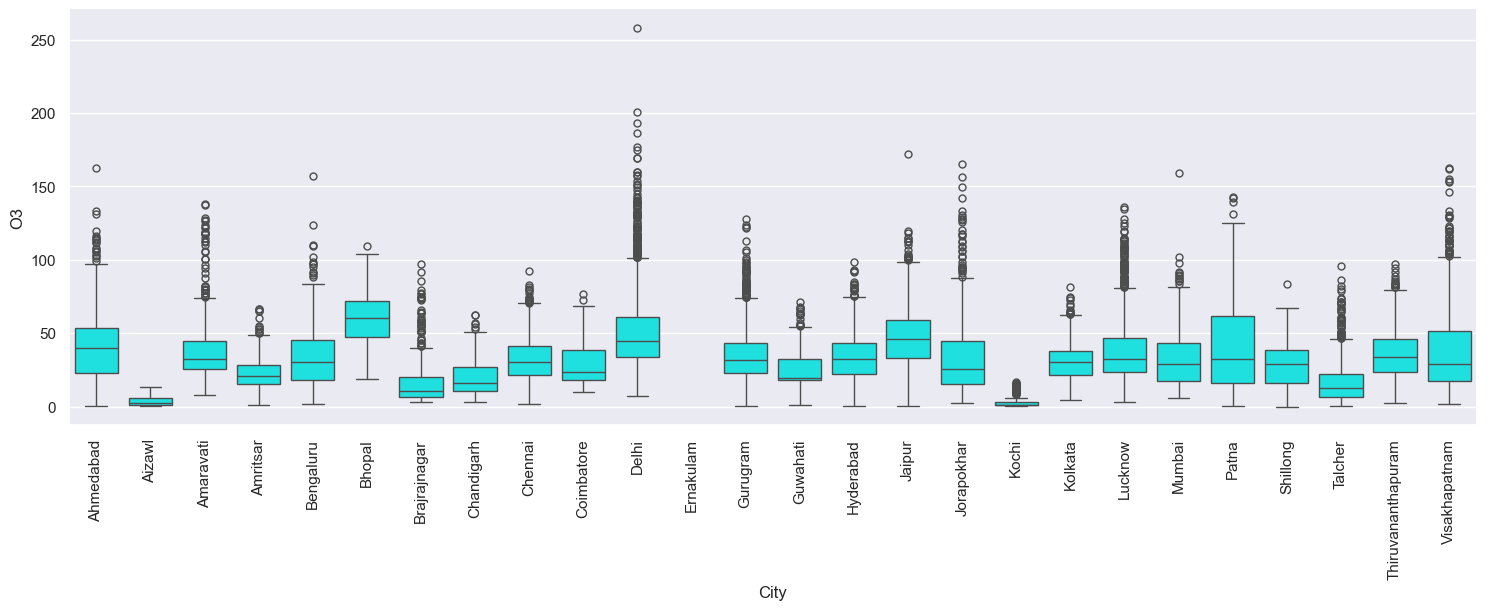

In [102]:
graph2 = sns.catplot(x='City', y='O3', kind ='box',data=df,height=5,aspect=3,color='cyan')
graph2.set_xticklabels(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

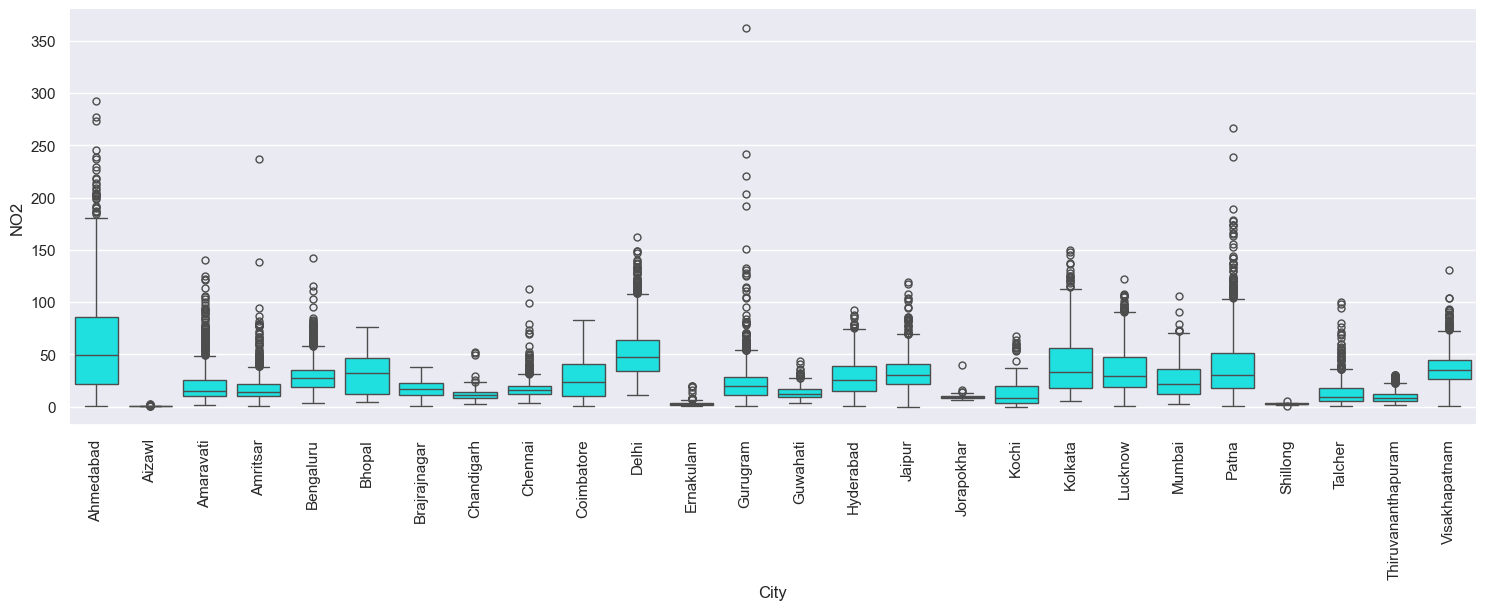

In [103]:
graph3 = sns.catplot(x='City', y='NO2', kind ='box',data=df,height=5,aspect=3,color='cyan')
graph3.set_xticklabels(rotation=90)
plt.show

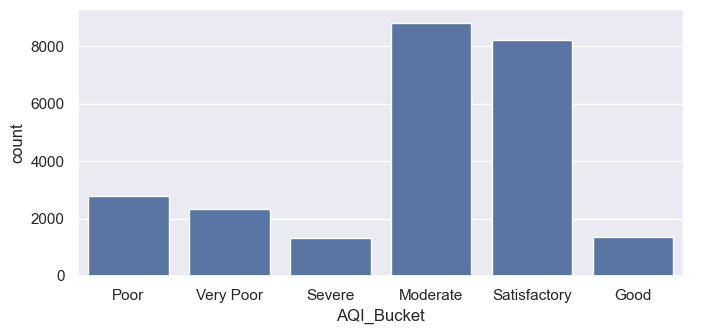

In [104]:
graph5 = sns.catplot(x="AQI_Bucket", data=df, kind='count',height=3.5, aspect=2)

In [105]:
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
City              0
Date              0
AQI               0
AQI_Bucket        0
dtype: int64

In [106]:
df.describe().loc['mean']

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [107]:
df.replace({
    "PM2.5":{np.nan:67.476613},
    "PM10":{np.nan:118.454435},
    "NO":{np.nan:17.622421},
    "NO2":{np.nan:28.978391},
    "NOx":{np.nan:32.289012},
    "NH3":{np.nan:23.848366},
    "CO":{np.nan:2.345267},
    "SO2":{np.nan:14.362933},
    "O3":{np.nan:34.912885},
    "Benzene":{np.nan:3.458668},
    "Toluene":{np.nan:9.525714},
    "Xylene":{np.nan:3.588683},
    "AQI":{np.nan:166.463581},
},inplace=True)

Better method, 

df.fillna(df.mean(), inplace=True)

In [108]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [109]:
df.drop(['AQI_Bucket'],axis=1,inplace=True)


In [110]:
df.head().T

,28,29,30,31,32
City,Ahmedabad,Ahmedabad,Ahmedabad,Ahmedabad,Ahmedabad
Date,2015-01-29,2015-01-30,2015-01-31,2015-02-01,2015-02-02
PM2.5,83.13,79.84,94.52,135.99,178.33
PM10,118.454435,118.454435,118.454435,118.454435,118.454435
NO,6.93,13.85,24.39,43.48,54.56
NO2,28.71,28.68,32.66,42.08,35.31
NOx,33.72,41.08,52.61,84.57,72.8
NH3,23.848366,23.848366,23.848366,23.848366,23.848366
CO,6.93,13.85,24.39,43.48,54.56
SO2,49.52,48.49,67.39,75.23,55.04


<function matplotlib.pyplot.show(close=None, block=None)>

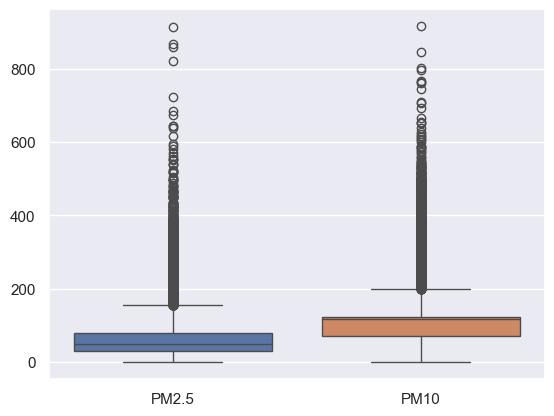

In [111]:
sns.boxplot(data=df[['PM2.5','PM10']])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

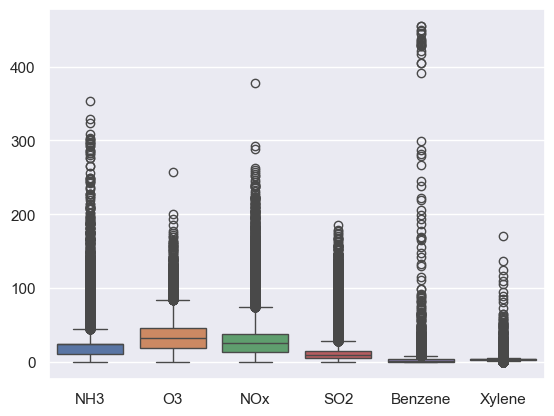

In [112]:
sns.boxplot(data=df[['NH3','O3','NOx','SO2','Benzene','Xylene']])
plt.show

In [113]:
# IQR method
#IQR = Q3-Q1
def replace_outliers(df):
    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3-Q1
        lb = Q1-1.5*IQR
        ub = Q3+1.5*IQR
        df[col] = df[col].apply(
            lambda x:Q1 if x<lb else (Q3 if x>ub else x) 
        )
    return df

In [114]:
df = replace_outliers(df)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24850.0,55.174281,31.829575,0.04,29.56,50.165000,79.505625,154.30
PM10,24850.0,101.351323,39.079916,0.03,71.78,118.454435,122.955625,199.70
NO,24850.0,12.507694,8.762015,0.03,5.72,10.075000,19.710000,40.68
NO2,24850.0,25.901114,16.669494,0.01,12.09,22.535000,37.910000,76.62
NOx,24850.0,26.574513,16.138682,0.00,14.03,25.720000,38.170000,74.38
NH3,24850.0,19.486584,9.630370,0.01,11.28,23.848366,24.710000,44.85
CO,24850.0,1.040507,0.615436,0.00,0.59,0.950000,1.530000,2.94
SO2,24850.0,10.334743,5.680901,0.01,5.79,9.430000,14.890000,28.52
O3,24850.0,33.177781,17.487724,0.01,19.64,32.060000,45.395625,83.99
Benzene,24850.0,2.098520,1.828135,0.00,0.34,1.810000,3.458668,8.13


<function matplotlib.pyplot.show(close=None, block=None)>

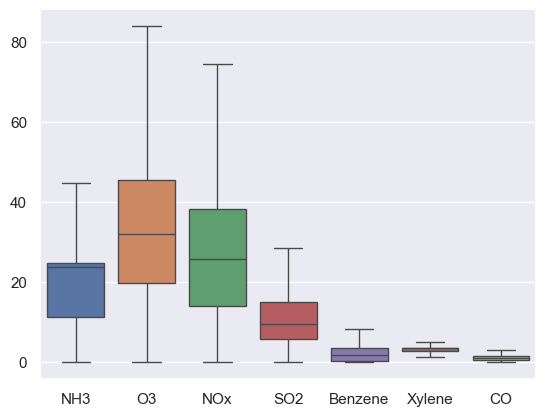

In [115]:
sns.boxplot(data=df[['NH3','O3','NOx','SO2','Benzene','Xylene','CO']])
plt.show

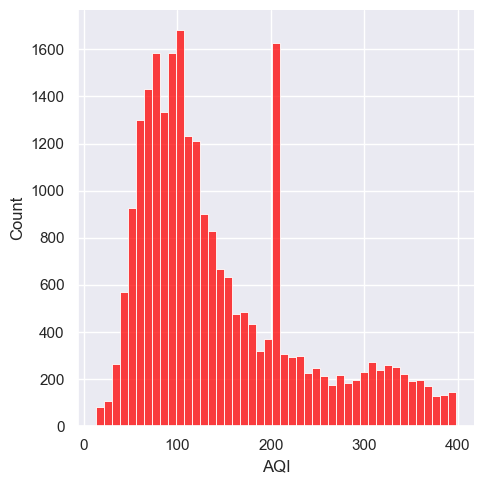

In [116]:
sns.displot(data=df,color='red', x ='AQI')
plt.show()

In [117]:
df1=df.drop(columns=['City','Date'])

<function matplotlib.pyplot.show(close=None, block=None)>

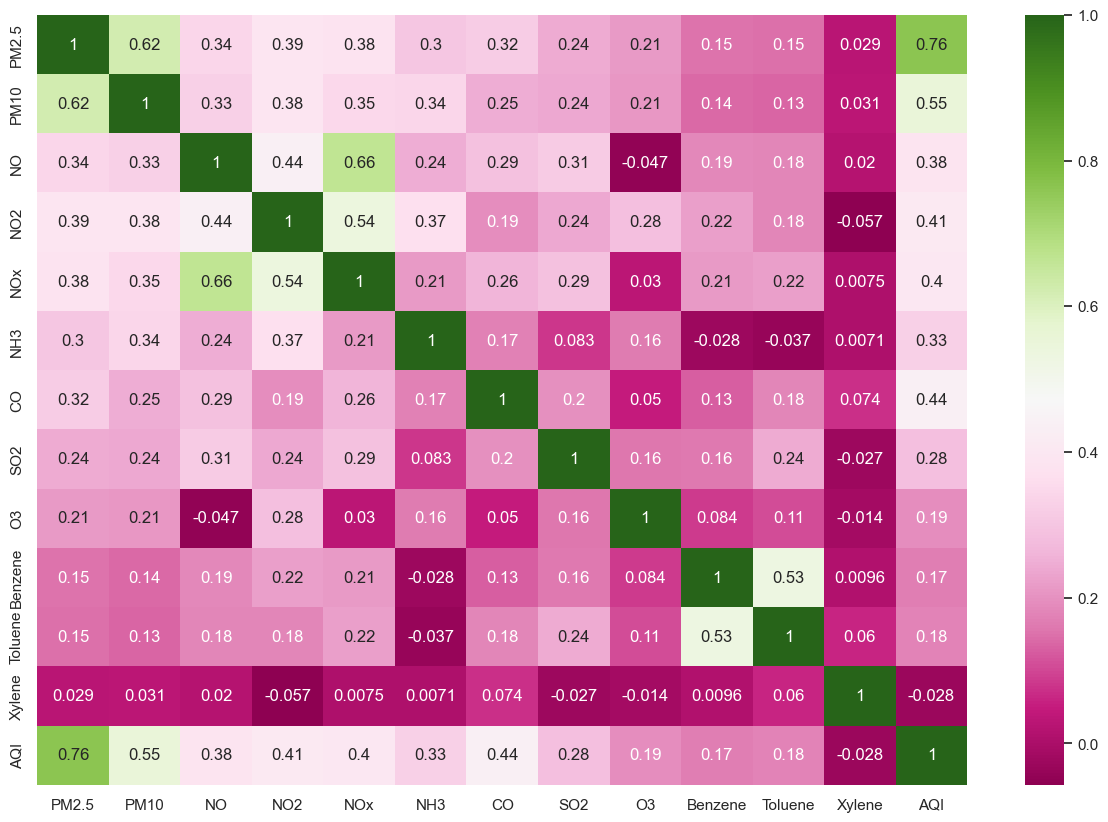

In [118]:
# Heatmap analysis, correlation map
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True, cmap='PiYG')
# ,cmap="Purples" "Reds", center =1 0
plt.show

## Data Modeling

In [119]:
df.drop(['Date','City'],axis=1, inplace=True)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.02,0.00,3.140000,209.0
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.04,0.00,4.810000,328.0
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.24,0.01,3.588683,208.0
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.40,0.04,3.588683,208.0
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.46,0.06,3.588683,208.0


In [120]:
#Scaling using SKlearn Normalizing
from sklearn.preprocessing import StandardScaler
df1=  StandardScaler().fit_transform(df)
df1

array([[ 0.87831149,  0.43765334, -0.63658947, ..., -1.32511601,
        -0.29450027,  0.70999757],
       [ 0.77494642,  0.43765334,  0.15319907, ..., -1.32511601,
         2.69513707,  2.07124258],
       [ 1.23616198,  0.43765334,  1.35614288, ..., -1.32298652,
         0.50873294,  0.69855854],
       ...,
       [-1.01367767, -0.91151782, -1.03376636, ..., -1.32298652,
        -1.17169925, -0.90290618],
       [-1.21066824, -1.31480214, -0.96528759, ..., -1.32511601,
        -1.17169925, -1.06305265],
       [-1.26219369, -0.90460877, -1.3818668 , ...,  0.70336955,
         0.50873294, -1.10880878]])

In [121]:
df = pd.DataFrame(df1, columns=df.columns)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0.878311,0.437653,-0.636589,0.168508,0.442764,0.452929,0.795376,0.801871,1.520081,-1.136985,-1.325116,-0.294500,0.709998
1,0.774946,0.437653,0.153199,0.166708,0.898821,0.452929,0.795376,0.801871,0.698774,-1.126045,-1.325116,2.695137,2.071243
2,1.236162,0.437653,1.356143,0.405473,1.613267,0.452929,0.795376,0.801871,0.698774,-1.016642,-1.322987,0.508733,0.698559
3,2.539065,0.437653,0.822008,0.970588,0.718505,0.452929,0.795376,0.801871,0.698774,-0.929119,-1.316598,0.508733,0.698559
4,0.764500,0.437653,0.822008,0.564449,2.864324,0.452929,0.795376,0.801871,0.698774,-0.896298,-1.312339,0.508733,0.698559


#### Regression Model

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [128]:
# Feature and Target Selection
x = df.drop(['AQI'],axis=1)
y = df['AQI']

In [129]:
# Training set - 80%, Testing set - 20%
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42 )
print('Shape x_train',x_train.shape)
print('Shape x_test',x_test.shape)
print('Shape y_train',y_train.shape)
print('Shape y_test',y_test.shape)

Shape x_train (19880, 12)
Shape x_test (4970, 12)
Shape y_train (19880,)
Shape y_test (4970,)


In [132]:
#Linear regression
l_reg =LinearRegression()
l_reg.fit(x_train, y_train)

LinearRegression()

In [133]:
#Predicting dependent variable
train_pre= l_reg.predict(x_train)
test_pre = l_reg.predict(x_test)

In [148]:
# Evaluation Parameters -- Linear Regression
RMSE_train = (np.sqrt(mean_squared_error(y_train,train_pre)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pre)))
print("RMSE training data", RMSE_train)
print("RMSE test data", RMSE_test)
print()
print("R score test Data", l_reg.score(x_train,y_train))
print("R score training Data", l_reg.score(x_test,y_test))

RMSE training data 0.5917597964606266
RMSE test data 0.5820293948034536_
R score test Data 0.6510774205877974
R score training Data 0.6562598886507953


In [149]:
# KNN
knn= KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [150]:
#Predicting dependent variable
train_pre= knn.predict(x_train)
test_pre = knn.predict(x_test)

# Evaluation Parameters -- KNN
RMSE_train = (np.sqrt(mean_squared_error(y_train,train_pre)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pre)))
print("RMSE training data", RMSE_train)
print("RMSE test data", RMSE_test)
print()
print("R score test Data", knn.score(x_train,y_train))
print("R score training Data", knn.score(x_test,y_test))

RMSE training data 0.3899105558468102
RMSE test data 0.4802534245936315

R score test Data 0.8485155176263993
R score training Data 0.7659647276447062


In [151]:
# Decision Tree
DTreg = DecisionTreeRegressor()
DTreg.fit(x_train, y_train)

DecisionTreeRegressor()

In [152]:
#Predicting dependent variable
train_pre= DTreg.predict(x_train)
test_pre = DTreg.predict(x_test)

# Evaluation Parameters -- Decision Tree
RMSE_train = (np.sqrt(mean_squared_error(y_train,train_pre)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pre)))
print("RMSE training data", RMSE_train)
print("RMSE test data", RMSE_test)
print()
print("R score test Data", DTreg.score(x_train,y_train))
print("R score training Data", DTreg.score(x_test,y_test))

RMSE training data 0.02594854601836432
RMSE test data 0.5565716948945689

R score test Data 0.9993290900734868
R score training Data 0.6856723340259236


In [158]:
# Random forest regressor
RF_reg = RandomForestRegressor(n_jobs=-1)
RF_reg.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [ ]:
# import psutil
# print("CPU Usage:", psutil.cpu_percent(), "%")
# print("Available Cores:", psutil.cpu_count())

In [162]:
#Predicting dependent variable
train_pre= RF_reg.predict(x_train)
test_pre = RF_reg.predict(x_test)

# Evaluation Parameters -- Random Forest
RMSE_train = (np.sqrt(mean_squared_error(y_train,train_pre)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pre)))
print("RMSE training data", RMSE_train)
print("RMSE test data", RMSE_test)
print()
print("R score test Data", RF_reg.score(x_train,y_train))
print("R score training Data", RF_reg.score(x_test,y_test))

RMSE training data 0.1483722707213034
RMSE test data 0.3910584231722232

R score test Data 0.9780646964739883
R score training Data 0.8448243171193955
